# 1. Perkenalan

## Phase 2 - Milestones 1
_Milestones ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program Phase 2 khususnya pada Artificial Neural Network._

_Milestone 1 ini dikerjakan oleh **Rizal Aditya-008**_

---

## <b>Abstract</b>
### What is Customer Churn?

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRytvKB28ZLgeQVKTJhLIV90z_xSO24VgW2ug&usqp=CAU" alt="Churn Image" style="max-width=100%">

<span style="font-size:12px;"> Churn pelanggan didefinisikan sebagai ketika pelanggan atau pelanggan berhenti melakukan bisnis dengan perusahaan atau layanan. </span>

<span style="font-size:12px;"> Pelanggan di industri telekomunikasi dapat memilih dari berbagai penyedia layanan dan secara aktif beralih dari satu ke yang berikutnya. Bisnis telekomunikasi memiliki tingkat churn tahunan sebesar 15-25 persen di pasar yang sangat kompetitif ini.</span>

<span style="font-size:12px;"> Retensi pelanggan individual itu sulit karena sebagian besar perusahaan memiliki banyak pelanggan dan tidak mampu menghabiskan banyak waktu untuk masing-masing pelanggan. Biayanya akan terlalu besar. Namun, jika perusahaan dapat memperkirakan pelanggan mana yang kemungkinan besar akan pergi, ia dapat memfokuskan upaya retensi pelanggan hanya pada klien "berisiko tinggi" ini. Tujuan utamanya adalah untuk memperluas area cakupannya dan mengambil lebih banyak loyalitas pelanggan. </span>

<span style="font-size:12px;"><b>Untuk mengurangi churn pelanggan, perusahaan telekomunikasi perlu memprediksi pelanggan mana yang berisiko tinggi churn.</b></span> 

<span style="font-size:12px;">Untuk mendeteksi tanda-tanda awal potensi churn, pertama-tama kita harus melihat pandangan  tentang maslah pelanggan dan interaksi mereka di berbagai saluran, termasuk kunjungan toko/cabang, riwayat pembelian produk, panggilan layanan pelanggan, transaksi berbasis web, dan interaksi media sosial. </span> 

<span style="font-size:12px;">Akibatnya, dengan mengatasi churn, bisnis ini mungkin tidak hanya mempertahankan posisi pasar mereka, tetapi juga tumbuh dan berkembang. Semakin banyak pelanggan yang mereka miliki di jaringan mereka, semakin rendah biaya inisiasi dan semakin besar keuntungannya. Akibatnya, fokus utama perusahaan untuk sukses adalah mengurangi pengurangan klien dan menerapkan strategi yang efektif. </span> 

##<b> Task </b>
<span style="font-size:12px;"> Dari hasil penjelasan mengenai **Churn** diatas, kita akan membantu membuat model untuk menentukan dan meminimalisir pengguna yang akan melakukan **Churn** untuk mengurangi biaya yang dikeluarkan.</span>

### <b> Data Sources </b>
Unduh dataset yang akan digunakan [disini](https://www.kaggle.com/blastchar/telco-customer-churn)


# 2. Import Libraries

In [144]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sckit-Learn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Tensorflow
import tensorflow as tf
from tensorflow import keras

# 3. Data Loading

In [145]:
# Conect with google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Add path
path = '/content/gdrive/MyDrive/assignment_hacktive8/Phase_2/Milestone/p2---ftds008---m1-hujikan2/data/Telco-Customer-Churn.csv'

# Import dataset original
data_ori = pd.read_csv(path)

# Copy dataset
data_churn = data_ori.copy()
data_churn.drop(columns=['customerID'], axis=1, inplace=True) # Drop `customerID`
print(f"Jumlah baris dari dataset ini adalah : {data_churn.shape[0]}")
print(f"Jumlah kolom dari dataset ini adalah : {data_churn.shape[1]}")
data_churn.sample(5, random_state=0) # menampilkan 5 data secara acak dari dataset

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Jumlah baris dari dataset ini adalah : 7043
Jumlah kolom dari dataset ini adalah : 20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,No
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5,No
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,No
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,No


Kumpulan data mencakup informasi tentang:

* Pelanggan yang pergi dalam sebulan terakhir – kolomnya disebut Churn
* Layanan yang telah didaftarkan oleh setiap pelanggan – telepon, banyak saluran, internet, keamanan online, pencadangan online, perlindungan perangkat, dukungan teknis, dan streaming TV dan film
* Informasi akun pelanggan – sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan
* Info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan

---
**Understanding About datasets**

|Nama Kolom|Description|Response|
|-|-|-|
|customerID|ID Pelanggan|-|
|gender|Apakah pelanggan laki-laki atau perempuan|-|
|SeniorCitizen | Apakah pelanggan adalah warga senior atau tidak| (Yes=1, No=0)|
|Partner|Apakah customer memiliki partner atau tidak|(Yes, No)|
|Dependents |Apakah nasabah memiliki tanggungan atau tidak|(Yes, No)|
|tenure | Berapa lama pelanggan berlangganan|months|
|PhoneService |Apakah pelanggan memiliki layanan telepon atau tidak|(Yes, No)|
|MultipleLines |Apakah pelanggan memiliki banyak saluran atau tidak|(Yes, No, No phone service)|
|InternetService | Penyedia layanan internet pelanggan|(DSL, Fiber optic, No)|
|OnlineSecurity |pakah pelanggan memiliki keamanan online atau tidak|(Yes, No, No internet service)|
|OnlineBackup |Apakah pelanggan memiliki backup online atau tidak|(Yes, No, No internet service)|
|DeviceProtection |Apakah pelanggan memiliki perlindungan perangkat atau tidak|(Yes, No, No internet service)|
|TechSupport |Apakah pelanggan memiliki dukungan teknis atau tidak|(Yes, No, No internet service)|
|StreamingTV |Apakah pelanggan memiliki TV streaming atau tidak|(Yes, No, No internet service)|
|StreamingMovies |Apakah pelanggan memiliki streaming film atau tidak|(Yes, No, No internet service)|
|Contract |Jangka waktu kontrak pelanggan|(Month-to-month, One year, Two year)|
|PaperlessBilling |Apakah pelanggan memiliki paperless billing atau tidak|(Yes, No)|
|PaymentMethod |Metode pembayaran pelanggan|(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges |Jumlah yang dibebankan kepada pelanggan setiap bulan|-|
|TotalCharges |Jumlah total yang dibebankan kepada pelanggan|-|
|**Churn**|Apakah pelanggan churn atau tidak|(Yes or No)

In [146]:
# Selanjutnya saya ingin melihat informasi dari dataset ini
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Dari hasil infromasi diatas dapat lihat bahwa dataset ini memiliki 2 tipe data, yaitu numerikal dan kategorikal

Dilihat juga bahwa data ini memiliki informasi data yang lengkap dan sepertinya tidak memiliki data yang hilang.

Terlihat juga bahwa fitur `TotalCharges` memiliki tipe data object yang seharusnya adalah **Numerikal** Kita akan merubahnya

In [147]:
# Merubah tipe data pada kolom TotalCharges
data_churn['TotalCharges'] = pd.to_numeric(data_churn.TotalCharges, errors='coerce')

# Merbah data categorical
data_churn['SeniorCitizen'] = data_churn['SeniorCitizen'].replace({1:'Yes', 0:'No'})

# Melihat informasi statistik deskriptive
data_churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


 Dari informasi statistik diatas terlihat bahwa:
 - Informasi pada `tenure` terlihat bahwa rata-rata pelanggan adalah 32 bulan dengan maximum `tenure` adalah 72 bulan.
 - Informasi pada kolom `Monthly Charges` terlihat bahwa pelanggan yang dikenakan biaya perbulan rata-rata 64.78 dengan maximum biaya 118.75.
 - Informasi pada kolom `Total Charges` terlihat bahwa pelanggan yang dikenakan biaya total rata-rata 2282 dan maximum beban total biaya adalah 8684. 

Selanjutnnya kita akan melakukan eksplorasi data 

# 4. Exploratory Data Analysis (EDA)

In [148]:
# Melihat 5 data secara acak
data_churn.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4986,Female,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),79.55,958.25,No
2812,Male,No,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Electronic check,104.05,6890.00,Yes
3371,Female,No,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,180.30,Yes
5896,Male,Yes,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.45,1789.65,No
2913,Male,No,No,No,52,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),63.90,3334.95,No


### 4.1 Melihat Proporsi dari target (churn)

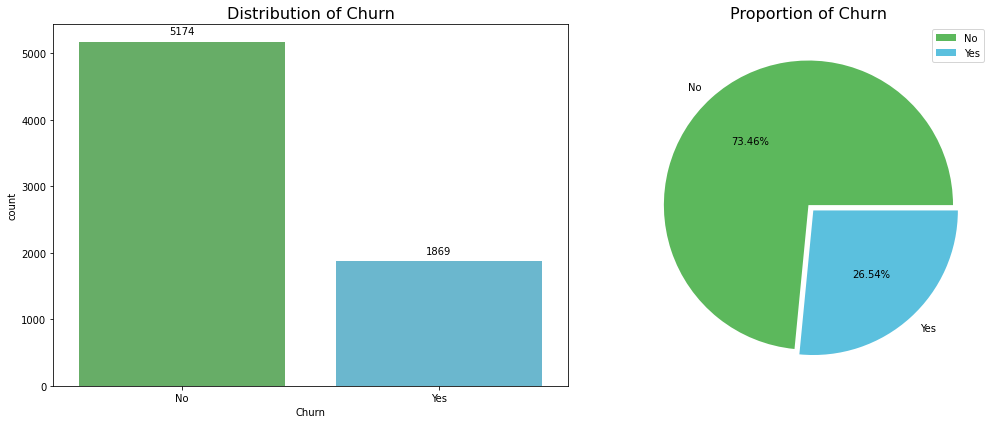

In [149]:
# your colors
colors = ['#5cb85c', '#5bc0de']

# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_churn, x='Churn', palette = colors)
plt.title("Distribution of Churn", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# plot pie chart
plt.subplot(1,2,2)
plt.pie(data_churn['Churn'].value_counts(), labels=data_churn['Churn'].unique(), explode=(0,0.05), autopct='%.2f%%', colors=colors)
plt.title("Proportion of Churn", fontsize='16')
plt.legend()
plt.tight_layout()
plt.show()

Dari hasil visualisasi tentang proporsi dari target(**Churn**) diatas terlihat bahwa : 
- Pelanggan yang melakukan **Churn** lebih sedikit dibandingkan dengan pelanggan yang tidak melakukan **Churn** persentasenya adalah 73.46% (5174) yang tidak melakukan **Churn** dan 26.54% (1864) yang melakukan **Churn**
- Bisa dikatan dataset ini **imbalace** dengan ratio 1:3 sehingga kita akan melakukan **handling imbalance** nantinya

### 4.2 Melihat informasi Churn berdasarkan Gender

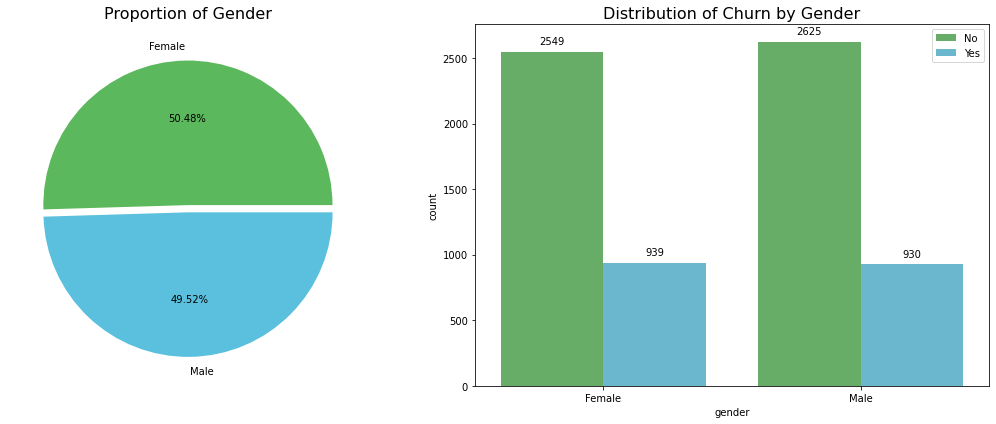

In [150]:
# membuat figure
plt.figure(figsize=(15,6))

# plot pie chart
plt.subplot(1,2,1)
plt.pie(data_churn['gender'].value_counts(), labels=data_churn['gender'].unique(), explode=(0,0.05), autopct='%.2f%%', colors=colors)
plt.title("Proportion of Gender", fontsize='16')

# plot countplot
plt.subplot(1,2,2)
p1 = sns.countplot(data=data_churn, x='gender', hue='Churn', palette = colors)
plt.title("Distribution of Churn by Gender", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend()
plt.tight_layout()
plt.show()


Dari informasi visulisasi diatas, terlihat bahwa pelanggan berdasarkan `Gender` tidak terlihat berbeda jauh, antara **Male** dan **Female**. 

Dan dari informasi visualisasi berdasarkan `Gender` dalam melakukan `Churn` terlihat bahwa yang melakukan **Churn** tidak terlalu berbeda jauh terhadap `Gender` baik pelanggan yang tidak melakukan **Churn** dan yang melakukan **Churn**.

### 4.3 Melihat informasi dari jenis pembayaran

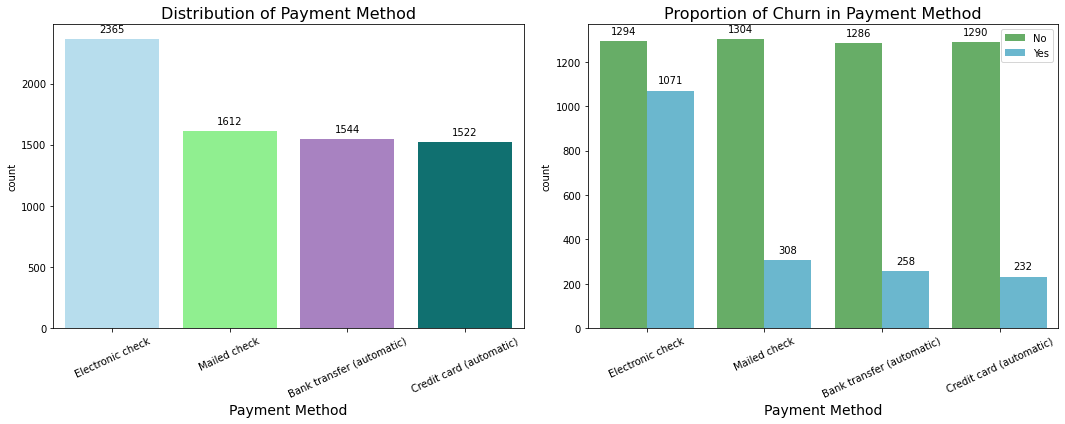

In [151]:
# your colors
colors = ['#5cb85c', '#5bc0de']

# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_churn, x='PaymentMethod', palette = ['#aee1f6', '#80ff80', '#aa77cc', '#008080'])
plt.title("Distribution of Payment Method", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation = 25) # Rotates X-Axis Ticks by 25-degrees
plt.xlabel("Payment Method", fontsize='14')

# plot chart
plt.subplot(1,2,2)
p2 = sns.countplot(data=data_churn, x='PaymentMethod', hue='Churn', palette = colors)
plt.title("Distribution of Churn", fontsize='16')
for p in p2.patches:
    p2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Proportion of Churn in Payment Method", fontsize='16')
plt.xticks(rotation = 25) # Rotates X-Axis Ticks by 25-degrees
plt.xlabel("Payment Method", fontsize='14')
plt.legend()
plt.tight_layout()
plt.show()

Dari hasil informasi visualisasi diatas, terlihat bahwa :
- Berdasarkan jenis `Payment Method`, **Electronic check** adalah yang paling sering digunakan dari jenis pembayaran lain. Dibandingkan dengan jenis pembayaran **Mailed check**, **Bank Transfer** dan **Credit Card** yang tidak jauh berbeda dalam penggunakan jenis pembayaran yang dilakukan.
- Berdasarkan `Churn` terhadap `PaymentMethod` terlihat bahwa pelanggan yang melakukan **Churn** lebih dominan menggunakan jenis pembayaran **Electronic check**. Dibandingkan dengan jenis pembayaran **Mailed check**, **Bank Transfer** dan **Credit Card**.
- Mungkin saja pelanggan yang menggunakan metode pembayaran **Automatic payment** lebih nyaman dalam melakukan pembayaran dan terlihat bahwa pelanggan yang menggunakan **Automatic Payment** lebih sedikit dalam melakukan **Churn**.

### 4.4 Melihat informasi tentang jangka waktu pelanggan

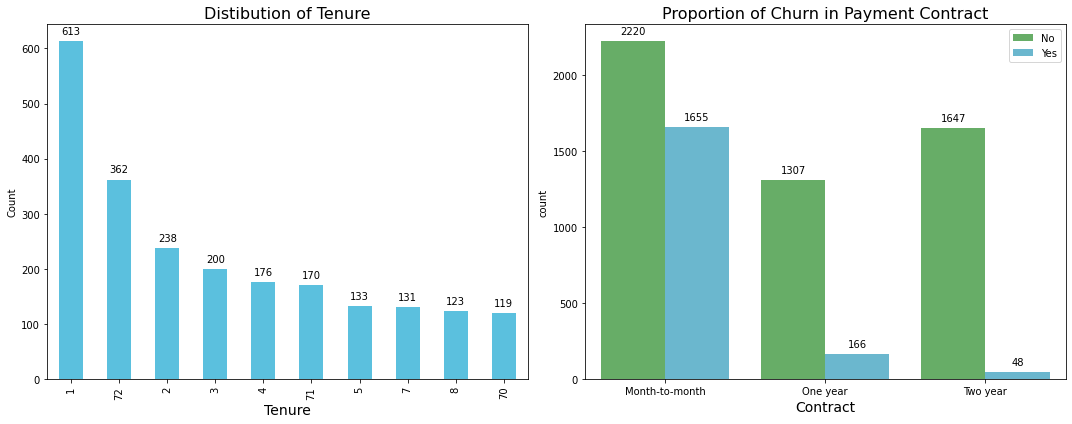

In [152]:
# Get the data
tenure = data_churn['tenure'].value_counts().head(10)

# Create figure
plt.figure(figsize=(15,6))

# Plot the data
plt.subplot(1,2,1)
ax = tenure.plot(kind='bar', color="#5bc0de")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel('Tenure', fontsize='14') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Distibution of Tenure', fontsize='16') # add title to the plot

# plot count data *Contract*
plt.subplot(1,2,2)
ax1 = sns.countplot(data=data_churn, x='Contract', hue='Churn', palette=colors )
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Contract", fontsize='14')
plt.title('Proportion of Churn in Payment Contract', fontsize='16') # add title to the plot
plt.legend()
plt.tight_layout()
plt.show()

Dari hasil visualisasi diatas terlihat bahwa:
- Berdasarkan visualisasi `Tenure` terlihat bahwa pelanggan lebih tertarik mengambil `Tenure` dalam waktu hanya 1 bulan saja, mungkin saja pelanggan ingin memastikan untuk mendapatkan pelayanan atau service yang terbaik dari perusahaan ini. Sehingga para pelanggan mengambil `Tenure` dalam jangka waktu 1 bulan saja.
- Berdasarkan visualisasi `Contract` terlihat juga pelanggan lebih sering mengambil `Contract` dalam jangka waktu hanya perbulan (**Month to month**) dibandingkan dengan setahun bahkan dua tahun. 
- Terlihat juga bahwa pelanggan yang melakukan **Churn** lebih dominan dalam mengambil `Contract` perbulan. Mungkin saja kepuasan pelanggan terhadap service yang diberikan oleh perusahaan Telco ini tidak maksimal.


### 4.5 Melihat informasi Dependent and Partner

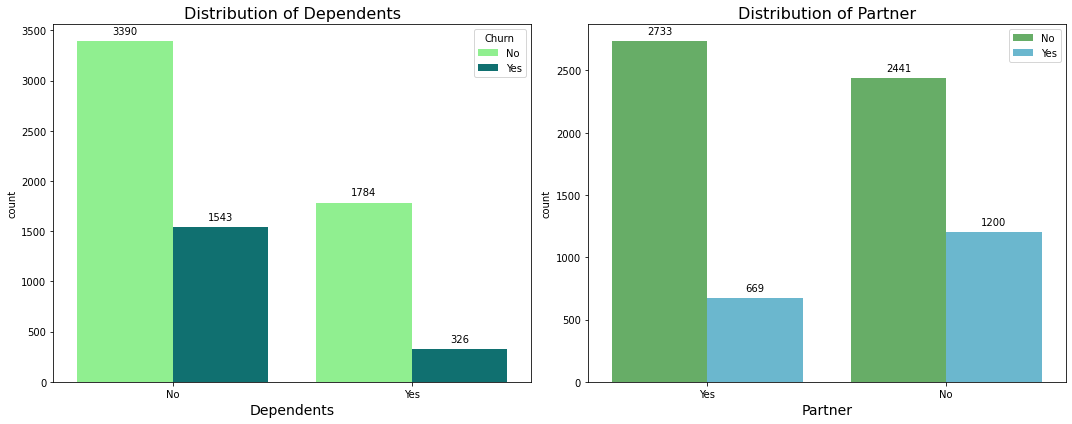

In [153]:
# your colors
colors = ['#5cb85c', '#5bc0de']

# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_churn, x='Dependents',hue='Churn',  palette = ['#80ff80','#008080'])
plt.title("Distribution of Dependents", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Dependents", fontsize='14')

# plot countplot
plt.subplot(1,2,2)
p2 = sns.countplot(data=data_churn, x='Partner', hue='Churn', palette = colors)
plt.title("Distribution of Churn", fontsize='16')
for p in p2.patches:
    p2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Distribution of Partner", fontsize='16')
plt.xlabel("Partner", fontsize='14')
plt.legend()
plt.tight_layout()
plt.show()


Dari hasil visualisasi diatas terlihat bahwa:
- Berdasarkan visualisasi `Dependents` terlihat bahwa pelanggan yang tidak memiliki tanggungan cenderung lebih banyak melakukan **Churn** dibandingkan dengan pelanggan yang tidak memiliki tanggungan.
- Berdarkan visualisasi `Partner` terlihat bahwa pelanggan yang tidak memiliki pasangan cenderung melakukan **Churn** dibandingkan dengan pelanggan yang memiliki pasangan.

### 4.6 Melihat informasi mengenai Internet Service dan Phone Service

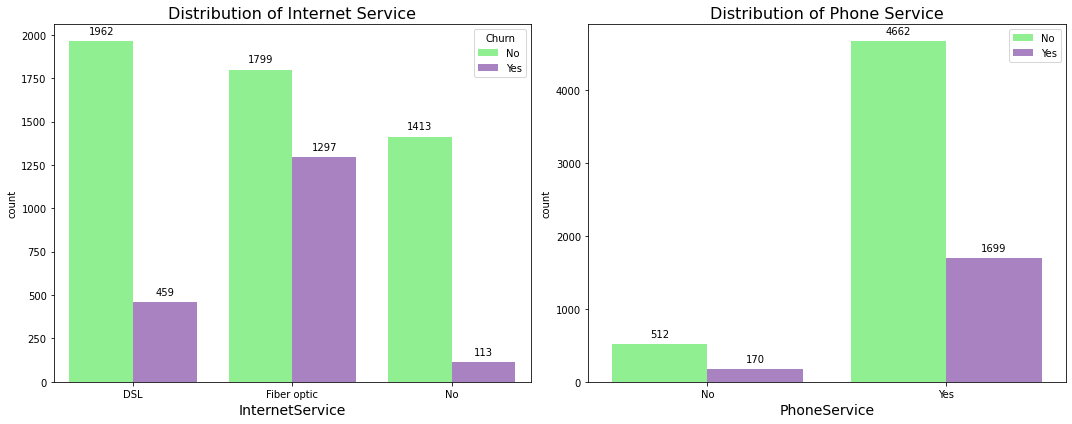

In [154]:
# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_churn, x='InternetService',hue='Churn',  palette = ['#80ff80','#aa77cc'])
plt.title("Distribution of Internet Service", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("InternetService", fontsize='14')

# plot countplot
plt.subplot(1,2,2)
p1 = sns.countplot(data=data_churn, x='PhoneService',hue='Churn',  palette = ['#80ff80','#aa77cc'])
plt.title("Distribution of Phone Service", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("PhoneService", fontsize='14')
plt.legend()
plt.tight_layout()
plt.show()


Dari hasil informasi vusualisasi diatas:
- Terlihat bahwa `InternetService` memiliki pelanggan yang melakukan **Churn** tertingga pada pelayanan *Fiber Optic*, mungkin saja pelayanan internet yang diberikan tidak maksimal sehingga para pelanggan melakukan **Churn**.
- Terlihat bahwa pelanggan yang memiliki `PhoneService` lebih dominan dalam melakukan **Churn** dibandingkan dengan pelanggan yang tidak memiliki `PhoneService`.

### 4.7 Melihat informasi mengenai Online Security dan Tech Support

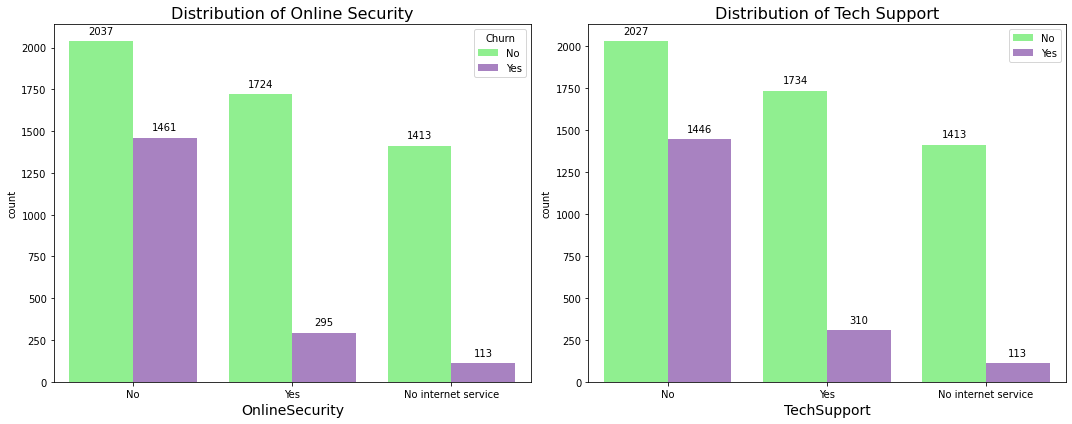

In [155]:
# membuat figure
plt.figure(figsize=(15,6))

# plot countplot
plt.subplot(1,2,1)
p1 = sns.countplot(data=data_churn, x='OnlineSecurity',hue='Churn',  palette = ['#80ff80','#aa77cc'])
plt.title("Distribution of Online Security", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("OnlineSecurity", fontsize='14')

# plot countplot
plt.subplot(1,2,2)
p1 = sns.countplot(data=data_churn, x='TechSupport',hue='Churn',  palette = ['#80ff80','#aa77cc'])
plt.title("Distribution of Tech Support", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("TechSupport", fontsize='14')
plt.legend()
plt.tight_layout()
plt.show()


Dari hasil visualisasi diatas terlihat bahwa:
- Dari visualisasi `OnlineSecurity` terlihat bahwa pelanggan yang tidak memiliki keamanan cenderung **Churn** dibandingkan dengan pelanggan yang memiliki keamanan. Mungkin saja lebih baik membarikan keamanan pada para pelanggan untuk meminimalisir pelanggan yang akan **Churn** dan bisa meningkatkan income perusahaan.
- Dari visualisasi `TechSupport` terlihat bahwa pelanggan yang tidak memiliki teknisi support cenderung melakukan **Churn** dibandingkan dengan pelanggan yang memiliki teknisi. 

### 4.8 Melihat informasi distribusi Charges dengan Churn

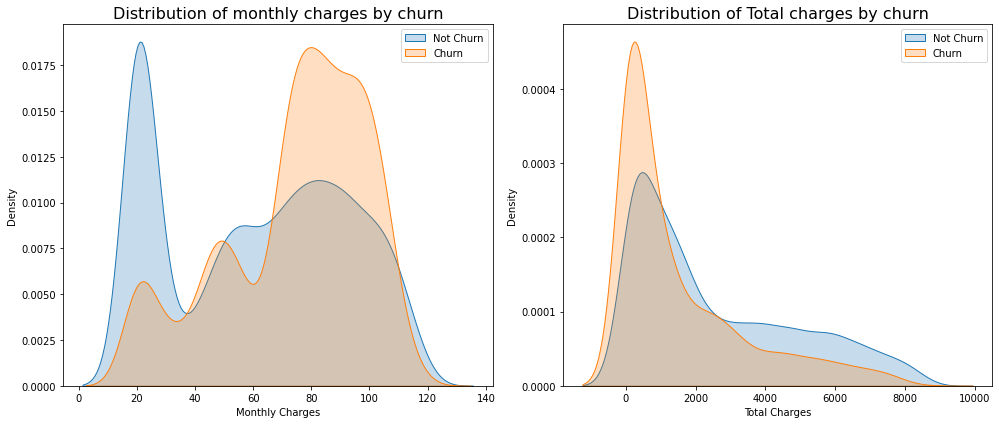

In [156]:
# Membuat figure
plt.figure(figsize=(14,6))

# Plot kde distribution churn 
plt.subplot(1,2,1)
ax = sns.kdeplot(data_churn.MonthlyCharges[(data_churn["Churn"] == 'No') ], shade = True)
ax = sns.kdeplot(data_churn.MonthlyCharges[(data_churn["Churn"] == 'Yes') ], shade= True)
ax.legend(["Not Churn", "Churn"])
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn', fontsize='16')

# Plot kde distribution churn 
plt.subplot(1,2,2)
ax = sns.kdeplot(data_churn.TotalCharges[(data_churn["Churn"] == 'No') ], shade = True)
ax = sns.kdeplot(data_churn.TotalCharges[(data_churn["Churn"] == 'Yes') ], shade= True)
ax.legend(["Not Churn", "Churn"])
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn', fontsize='16')
plt.tight_layout()
plt.show()

Dari hasil informasi diatas terlihat bahwa:
- Pelanggan cenderung melakukan **Churn** tehadap biaya yang dibebankan terlalu besar perbulannya dibandingkan dengan total biaya yang dibebankan.
- Terlihat bahwa pelanggan akan melakukan **Churn** ketika total biaya yang dibebankan cenderung sedikit. Ini berbanding terbalik dengan Biaya bulanan yang dibebankan.

### 4.9 Conclusion EDA

Setelah kita melakukan Exploratory Data Analysis (EDA) secara singkat kita dapat menarik kesimpulan sebagai berikut:
- Dari hasil informasi mengenai dataset ini, dataset ini memiliki 7043 baris data dan 21 kolom.
- Dari informasi statistik yang didapatkan bahwa:
  - Para pelanggan rata-rata mengambil `tenure` selama 32 bulan dan maximum adalah 72 bulan. 
  - Para pelanggan juga memiliki biaya rata-rata perbulan yang dibebankan biaya sebesar 64.78 dan dengan beban maximum biaya 1888.75
- Dari hasil informasi mengenai para pelanggan yang melakukan `Churn` dapat dilihat bahwa sebanyak 1864 orang (26.54%) pelanggan melakukan **Churn** dan sebanyak 5174 orang (73.46%) pelanggan tidak melakukan **Churn** ini merupakan berita yang bisa dikataan cukup bagus untuk bisnis karena para pelanggan melakukan **Churn** lebih sedikit dibandingkan yang tidak melakukannya. Berbanding terbalik dengan kita yang akan membuat suatu model untuk memperkirakan pelanggan mana saja yang akan melakukan **Churn** karena dataset nya tidak **balance** sehingga diperlukan handling **imbalance** dataset nantinya.
- Terlihat dari visualisasi bahwa para pelanggan cenderung mengambil `tenure` selama 1 bulan saja dengan masa `Contract` hanya perbulan saja dibandingkan dengan satu tahun dan dua tahun.
- Dari informasi `Dependent` dan `Partner` bahwa para pelanggan cenderung lebih banyak melakukan **Churn** terhadap mereka yang tidak memiliki tanggungan dan tidak memiliki pasangan.
- Dari informasi seperti `Service` terlihat bahwa pelanggan cenderung melakukan **Churn** apabila mereka tidak memiliki teknisi support dan keamanan.
- Dari informasi biaya yang dibebankan perbulan terlihat bahwa para pelanggan akan **Churn** ketika biaya yang dibebankan terlalu besar dibandingkan dengan rata-rata beban biaya perbulan.

# 5. Data Preprocessing

### 5.1 Get Data Inference

In [157]:
# mengambil 30 data secara random untuk data inference
data_inf = data_churn.sample(30, random_state=8)

# menghapus data inference dari dataframe 
data_churn = data_churn.drop(data_inf.index)

# Reset Index
data_churn.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Display data_inf
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),82.70,5831.20,No
1,Male,No,No,No,3,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,191.35,Yes
2,Male,No,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.30,75.30,Yes
3,Male,No,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.70,553.40,No
4,Female,No,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,No


### 5.2 Spliting Dataset

In [158]:
# define 'X' and 'y'
X = data_churn.drop(['Churn'], axis=1)
y = data_churn['Churn']

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Cek dimensi Train dan Test
print('---- Train - Set ----')
print('Dimensi dari X_train :', X_train.shape)
print('Dimensi dari y_train :', y_train.shape)
print('')
print('---- Test - Set ----')
print('Dimensi dari X_test :', X_test.shape)
print('Dimensi dari y_test :', y_test.shape)

---- Train - Set ----
Dimensi dari X_train : (5610, 19)
Dimensi dari y_train : (5610,)

---- Test - Set ----
Dimensi dari X_test : (1403, 19)
Dimensi dari y_test : (1403,)


Setelah kita melakukan splitting dataset menjadi data Train-set dan Test-set. Selanjutnya kita akan melakukan tahap **feature engineereing**

### 5.3 Feature Engineering

Di dalam feature engineering ini kita akan melakukan handling **outlier** dan melakukan handling **missing value**.

#### 5.3.1 Handling Outlier

In [159]:
# Create function for create histogram and boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16,4))
    
    # Create Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins=30, color='#49c726')
    plt.title("Distribution of Histogram")
    
    # Create Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable], color='#fca103')
    plt.title("Distibution of Boxplot")
    plt.show()

Tampilan sebelum di handling outliers


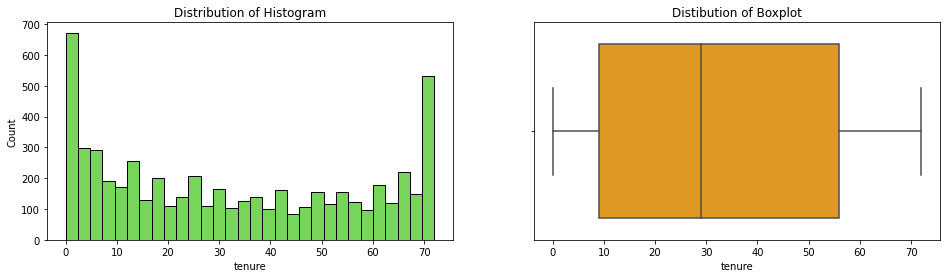

Skewness value 0.2348985405945066


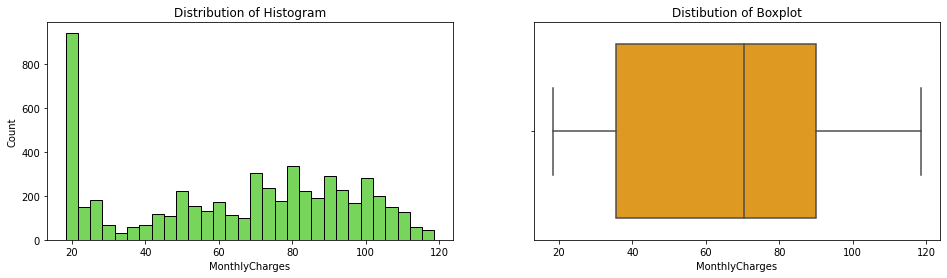

Skewness value -0.22133796669718517


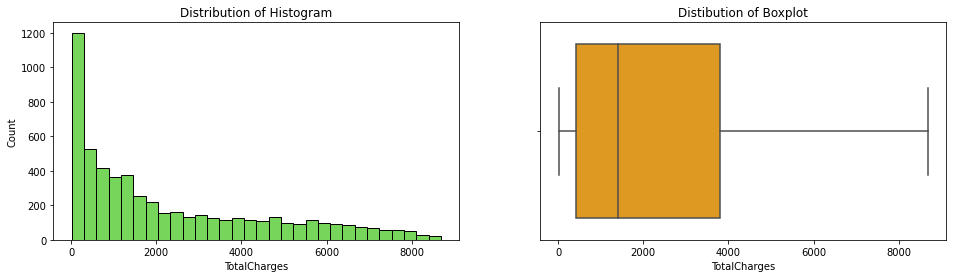

Skewness value 0.9624861133516079


In [160]:
print("Tampilan sebelum di handling outliers")
for cols in X_train.describe().columns:
    diagnostic_plots(X_train, cols)
    print(f"Skewness value {X_train[cols].skew()}")

In [161]:
## Create function for distibution normal

def find_normal_distribution(df, variables):
    upper_boundary = df[variables].mean() + 3 * df[variables].std()
    lower_boundary = df[variables].mean() - 3 * df[variables].std()
    
    return upper_boundary, lower_boundary


## Create function for skew distribution
def find_skew_distribution(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [162]:
# Melakukan pengecekan nilai skewness dan memeberikan label outlier
proses_outlier = pd.DataFrame({'columns': X_train.describe().columns, 
                               'nilai_skewness': data_churn.skew(axis=0)})
proses_outlier.reset_index(drop=True, inplace=True)

proses_outlier['detect'] = np.where(proses_outlier['nilai_skewness'].abs()>0.5, 
                                   'skewed', 'normal')

## Membuat fungsi untuk mencari percentage outlier
outliers = {'percentage_outlier': []}
for row in proses_outlier.index.tolist():
    col = proses_outlier.iloc[row]['columns']
    dist = proses_outlier.iloc[row]['detect']
    if dist == 'normal':
        upper_boundary, lower_boundary = find_normal_distribution(X_train, col)
    else:
        upper_boundary, lower_boundary = find_skew_distribution(X_train, col)
        
    total_right_tail = len(X_train[X_train[col] > upper_boundary])
    total_left_tail = len(X_train[X_train[col] < lower_boundary])
    total_right_tail_percent = total_right_tail/len(X_train)*100
    total_left_tail_percent = total_left_tail/len(X_train)*100
    total_outlier_percent =total_left_tail_percent + total_right_tail_percent
    
    outliers['percentage_outlier'].append(total_outlier_percent)
    
outliers = pd.DataFrame(outliers) # Memasukkan variabel outlier kedalam dataframe
# Melakukan penggabungan
X_train_outlier = pd.concat([proses_outlier, outliers], axis=1)
X_train_outlier['action'] = np.where(X_train_outlier['percentage_outlier']==0, 'No Action',
                                    np.where(X_train_outlier['percentage_outlier']>5, 'Capping','Trimming'))
X_train_outlier

,columns,nilai_skewness,detect,percentage_outlier,action
0,tenure,0.239230,normal,0.0,No Action
1,MonthlyCharges,-0.220850,normal,0.0,No Action
2,TotalCharges,0.961189,skewed,0.0,No Action


Dari hasil informasi pengecekan **Outlier** kita sepertinya memiliki dataset yang bersih terhadap outlier sehingga kita akan melanjutkana ke step berikutnya untuk handling **Missing Values**.

#### 5.3.2 Handling Missing Values
Di dalam handling missing values ini, akan melihat informasi berapa proporsi data yang hilang sehingga kita akan melakukan metode handling yang tepat untuk melakukan hanling missing values ini.

In [163]:
# Melihat missing value pada data X_train
pd.DataFrame(X_train.isnull().mean()*100).rename(columns={0:'Percentage Missing Value in X_train'}).sort_values(by='Percentage Missing Value in X_train')

,Percentage Missing Value in X_train
gender,0.000000
PaymentMethod,0.000000
PaperlessBilling,0.000000
Contract,0.000000
StreamingMovies,0.000000
StreamingTV,0.000000
TechSupport,0.000000
DeviceProtection,0.000000
MonthlyCharges,0.000000
OnlineBackup,0.000000


Dari hasil informasi diatas terlihat bahwa fitur `TotalCharges` kita akan melakukan handling missing value dengan menggunakan metode Imputasi sederhana saja. Kita akan Melakukan imputasi dengan pandas menggunakan **Mean** karena dataset ini cenderung berdistribusi normal

In [164]:
# Melihat presentase Null-value di dalam Train-set
print('Percentage missing value in y_train :',y_train.isnull().mean()*100)

Percentage missing value in y_train : 0.0


Hore sepertinya kita tidak memiliki missing value terhadap data ini sehingga kita tidak melakukan apa-apa.

In [165]:
# Melihat missing value pada data X_test
pd.DataFrame(X_test.isnull().mean()*100).rename(columns={0:'Percentage Missing Value in X_train'}).sort_values(by='Percentage Missing Value in X_train')

,Percentage Missing Value in X_train
gender,0.000000
PaymentMethod,0.000000
PaperlessBilling,0.000000
Contract,0.000000
StreamingMovies,0.000000
StreamingTV,0.000000
TechSupport,0.000000
DeviceProtection,0.000000
MonthlyCharges,0.000000
OnlineBackup,0.000000


Sama halnya seperti kita melakukan handling missing value terhadap data Train, kita akan melakukan imputasi dengan menggunakan bantuan pandas. Dengan imputasi **Mean** karena dataset ini berdistribusi normal.

In [166]:
# Melihat presentase Null-value di dalam Test-set
print('Percentage missing value in y_test :',y_test.isna().mean()*100)

Percentage missing value in y_test : 0.0


Setelah kita berhasil melakukan handling **Missing Value** kita akan melanjutkan ke step berikutnya.

Di tahap berikutnya saya akan melakukan Encoding gterhadap Label Target 


In [167]:
# Sekarang kita dapat mengubah label/target (ya dan tidak) menjadi 1 dan 0
y_train = y_train.replace({'No':0, 'Yes':1})
y_test = y_test.replace({'No':0, 'Yes':1})

### 5.5 Create Pipeline Sklearn

Di dalam Pipeline ini Kita menggunkan bantuan Library dari `jcopml` yang didalamnya dapat melakukan encode dan scaling dengan memilih parameter yang ingin kita gunakan.

In [168]:
# Splitting Columns (Numerical Columns and Categorical Columns)
# Numerical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
# Categorucal Columns
cat_columns = X_train.select_dtypes(include='object').columns.tolist()

# Create Pipeline
from jcopml.pipeline import num_pipe, cat_pipe # Library bantuan
# Menggabungkan pipeline numerical dan categorical
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling='standard'), num_columns),
    ("categoric", cat_pipe(encoder='ordinal'), cat_columns),
])

# Apply pipeline in the Train and Test set data
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [188]:
# Melakukan penyimpanan pipeline sckitlearn
import pickle

# proces
with open("preprocessor.pkl", "wb") as proses_file:
    pickle.dump(preprocessor, proses_file)

### 5.6 Over Sampling Method SMOTE




In [169]:
# Sampling for handling Imbalance dataset
from imblearn.over_sampling import SMOTE

X_train_final, y_train_final = SMOTE(sampling_strategy='minority').fit_resample(X_train_final, y_train)
print(y_train_final.value_counts())

0    4121
1    4121
Name: Churn, dtype: int64


### 5.7 Fitur Selection

In [170]:
# Define Columns
columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
           'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']	

# Create dataframe
X_train = pd.DataFrame(X_train_final, columns = columns)
X_test = pd.DataFrame(X_test_final, columns = columns) # create dataframe

# Correlation Analysis using Pearson Analysis
from scipy.stats.stats import pearsonr
out_list = []
for column in X_train.columns:
    corr_tuple = pearsonr(X_train[column], y_train_final)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])
corr_df.sort_values(by=['P-Value'], inplace=True)
corr_df.head(7)

,Features,Correlation,P-Value
0,tenure,-0.411903,0.000000e+00
16,Contract,-0.494894,0.000000e+00
10,OnlineSecurity,-0.352122,3.426828e-239
13,TechSupport,-0.341431,4.256696e-224
17,PaperlessBilling,0.259575,5.178637e-127
1,MonthlyCharges,0.252348,6.455765e-120
6,Dependents,-0.232441,1.562453e-101


Dari hasil informasi diatas tentang fitur mana saja yang memiliki korelasi dengan label target dengan menggunakan correlation analysis using person analysis, didapatkan 7 fitur yaitu :
1. Contract
2. tenure
3. OnlineSecurity
4. TechSupport
5. PaperlessBilling
6. TotalCharges
7. MonthlyCharges

Selanjutnya akan kita apply ke data Train dan test set

In [171]:
# Melakukan pemilihan fitur
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
       'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']	

X_train_final = X_train.drop(col,axis=1) # drop for apply fitur we will use in Train data
X_test_final = X_test.drop(col, axis=1) # drop for apply fitur we will use in Test data

In [200]:
X_train_final.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity',
       'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')

### 5.8 Split dataset again to get Validation-set

In [172]:
# Splitting data
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_final, y_train_final, test_size = 0.2, random_state = 42)

# Cek dimensi Train dan Test
print('---- Train - Set ----')
print('Dimensi dari X_train :', X_train_final.shape)
print('Dimensi dari y_train :', y_train_final.shape)
print('')
print('---- Val - Set ----')
print('Dimensi dari X_val :', X_val_final.shape)
print('Dimensi dari y_val :', y_val_final.shape)
print('')
print('---- Test - Set ----')
print('Dimensi dari X_test :', X_test_final.shape)
print('Dimensi dari y_test :', y_test.shape)

---- Train - Set ----
Dimensi dari X_train : (6593, 7)
Dimensi dari y_train : (6593,)

---- Val - Set ----
Dimensi dari X_val : (1649, 7)
Dimensi dari y_val : (1649,)

---- Test - Set ----
Dimensi dari X_test : (1403, 7)
Dimensi dari y_test : (1403,)


# 6. Model Definition
Di dalam model deinition ini kita akan menggunakan 2 model, seperti : 
> Membuat model Artifical Neural Network dengan menggunakan Sequential API dan Functional API

### 6.1 Sequential API

In [173]:
# Pipeline
dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)) # Pipeline
dataset = dataset.shuffle(12312).repeat(2).batch(64) # Pipeline

# Define Model's Architecture
model = tf.keras.models.Sequential() # Set model deep learning sequential
model.add(tf.keras.layers.Dense(units=60, activation='relu', input_shape=(7,), name='input'))  #Menambahkan input layer 
model.add(tf.keras.layers.BatchNormalization()) # add normalization
model.add(tf.keras.layers.Dense(units=45, activation='relu', name='Dense1')) #Menambahkan layer Dense dengan neuron 45 dan activation relu
model.add(tf.keras.layers.BatchNormalization()) # add normalization
model.add(tf.keras.layers.Dense(units=30, activation='relu', name='Dense2')) #Menambahkan layer Dense dengan neuron 30 dan activation relu
model.add(tf.keras.layers.BatchNormalization()) # add normalization
model.add(tf.keras.layers.Dense(units=15, activation='relu', name='Dense3')) #Menambahkan layer Dense dengan neuron 15 dan activation relu
model.add(tf.keras.layers.BatchNormalization()) # add normalization
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='output')) #Menambahkan output layer  dan activation sigmoid

# let's me know model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 60)                480       
                                                                 
 batch_normalization_21 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 Dense1 (Dense)              (None, 45)                2745      
                                                                 
 batch_normalization_22 (Bat  (None, 45)               180       
 chNormalization)                                                
                                                                 
 Dense2 (Dense)              (None, 30)                1380      
                                                                 
 batch_normalization_23 (Bat  (None, 30)              

Disini saya membuat model ANN sequential API dengan:
- 1 input layer
- 2 hidden layer (dengan masing neuron 45, 30, dan 15), activation = relu. '''
Activation yang dipakai relu, karena berdasarkan yang saya ketahui untuk base model coba menggunakan relu terlebih dahulu, baru dicoba gunakan activation yang lain (harus di state di awal, karena defaultnya adalah None)'''.
- 1 output layer, dengan 1 neuron dan activation = sigmoid. Karena sigmoid nilainya dari 0-1 dan target dataset ini adalah klasifikasi binary.
- Saya juga menambahkan batchnormalization di sini, dengan harapan proses training data lebih cepat. Dari beberapa artikel menyebutkan bahwa proses ini untuk menstandarisasi input ke network, bahkan dalam beberapa kasus dapat mempercepat training data dan mengurangi generalization error. 

### 6.2 Funtional API 

In [174]:
# Define Model's Architecture
inputs = tf.keras.layers.Input(shape=(7,), name='Input_layer') # Membuat input layer

dense_1 = tf.keras.layers.Dense(60, activation='relu', name='Dense1')(inputs) # Membuat layer dengan jumlah neuron 60 dengan activation relu
batch_normal1 = tf.keras.layers.BatchNormalization()(dense_1) # Add normalization

dense_2 = tf.keras.layers.Dense(40, activation='relu', name='Dense2')(batch_normal1) # Membuat layer dengan jumlah neuron 40 dengan activation relu
batch_normal2 = tf.keras.layers.BatchNormalization()(dense_2) # Add normalization

dense_3 = tf.keras.layers.Dense(20, activation='relu', name='Dense3')(batch_normal2) # Membuat layer dengan jumlah neuron 20 dengan activation relu
batch_normal3 = tf.keras.layers.BatchNormalization()(dense_3) # Add normalization
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='Output_layer')(batch_normal3) # Membuat output layer

# deklarasi model
model_ = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model_.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 Dense1 (Dense)              (None, 60)                480       
                                                                 
 batch_normalization_25 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 Dense2 (Dense)              (None, 40)                2440      
                                                                 
 batch_normalization_26 (Bat  (None, 40)               160       
 chNormalization)                                                
                                                                 
 Dense3 (Dense)              (None, 20)                820 

Disini saya membuat model ANN funtional API dengan:
* Input Layer : Mengambil input
* Dense Layer : Dense Layer adalah lapisan jaringan yang terhubung secara teratur.
* BatchNormalization Layer  : Normalisasi batch menerapkan transformasi yang mempertahankan keluaran rata-rata mendekati 0 dan simpangan baku keluaran mendekati 1.
* Activation function : Sebuah fungsi aktivasi dalam jaringan saraf mendefinisikan bagaimana jumlah bobot input diubah menjadi output dari sebuah node atau node dalam lapisan jaringan. Saya menggunkan activation='relu'
* Output Layer : menggunakan activation='Sigmoid'

# 7. Model Training

### 7.1 Sequential API

In [175]:
### Training Model Sequential API
### model compile
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(dataset, 
                    epochs=80, 
                    validation_data=(X_val_final, y_val_final))

Epoch 1/80
207/207 [==============================] - 2s 4ms/step - loss: 0.4949 - accuracy: 0.7593 - val_loss: 0.4994 - val_accuracy: 0.7611
Epoch 2/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4657 - accuracy: 0.7752 - val_loss: 0.4784 - val_accuracy: 0.7787
Epoch 3/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4571 - accuracy: 0.7820 - val_loss: 0.4746 - val_accuracy: 0.7696
Epoch 4/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.7833 - val_loss: 0.4652 - val_accuracy: 0.7738
Epoch 5/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4470 - accuracy: 0.7848 - val_loss: 0.4582 - val_accuracy: 0.7799
Epoch 6/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4466 - accuracy: 0.7881 - val_loss: 0.4611 - val_accuracy: 0.7683
Epoch 7/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.7904 - val_loss: 0.4755 - val_accuracy: 0.7696
Epoch 

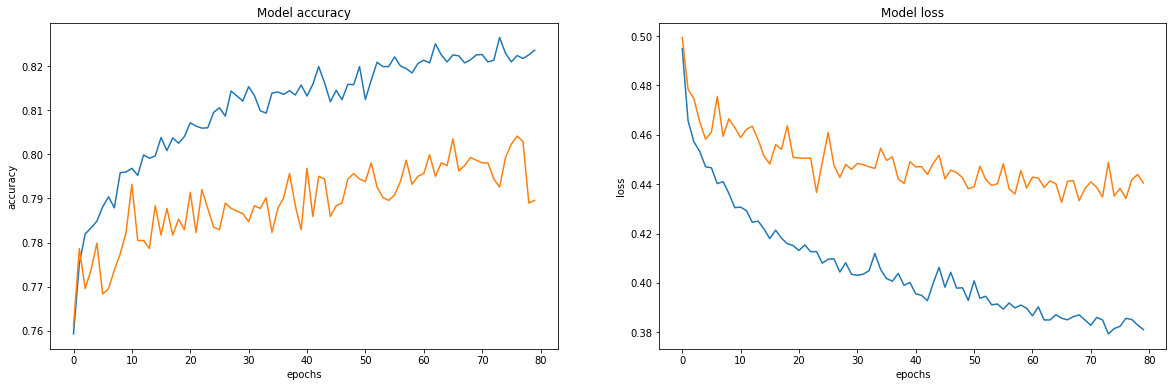

In [176]:
# Plotting Hasil training dari model Sequential API
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.ravel()

for i, met in enumerate([ "accuracy", "loss"]):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_'+met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)

Dari hasil visualisasi diatas, Setelah dilakukan training dengan 80x epoch didaptkan hasil:
- Dari model accuracy, terlihat bahwa antara **accuracy** line *biru* dengan **val_accuracy** line *orange* tidak terlalu berbeda jauh sehingga bisa dikatakan model cukup bagus, tetpai kalau dilihat dari grafik linenya terlihat bahwa semakin lama kita melakukan training atau epoch dinaikkan kemungkinan akan ada peningkatan accuracy.
- Dari model loss, terlih bahwa antara **loss** line *biru* dengan **val_loss** line *orange* semakin tinggi eopchnya kemungkinan nilai loss akan turun, tetapi terlihat ada perbedaan antara **loss** dengan **val_loss** seiring bertambahnya epoch

### 7.2 Functional API


In [177]:
### Training Model Functional API
### model compile
model_.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history2 = model_.fit(dataset, 
                    epochs=80, 
                    validation_data=(X_val_final, y_val_final))

Epoch 1/80
207/207 [==============================] - 2s 4ms/step - loss: 0.4796 - accuracy: 0.7626 - val_loss: 0.5019 - val_accuracy: 0.7574
Epoch 2/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4595 - accuracy: 0.7792 - val_loss: 0.4727 - val_accuracy: 0.7659
Epoch 3/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4552 - accuracy: 0.7808 - val_loss: 0.4673 - val_accuracy: 0.7683
Epoch 4/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.7833 - val_loss: 0.4696 - val_accuracy: 0.7671
Epoch 5/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7872 - val_loss: 0.4612 - val_accuracy: 0.7726
Epoch 6/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.7867 - val_loss: 0.4625 - val_accuracy: 0.7750
Epoch 7/80
207/207 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.7870 - val_loss: 0.4685 - val_accuracy: 0.7653
Epoch 

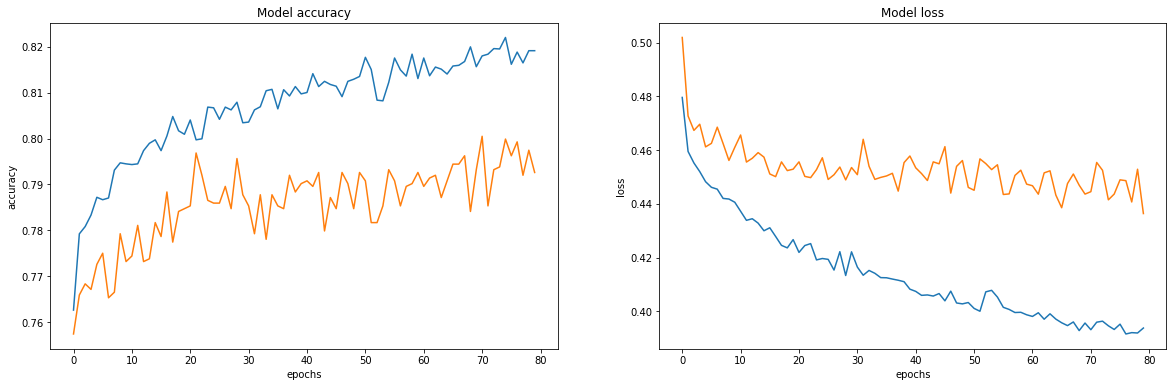

In [178]:
# Plotting Hasil training dari model Functional API
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.ravel()

for i, met in enumerate([ "accuracy", "loss"]):
    ax[i].plot(history2.history[met])
    ax[i].plot(history2.history['val_'+met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)

Dari hasil visualisasi menggunkan model Functional API, Setelah dilakukan training dengan 80x epoch didaptkan hasil:
- Dari model accuracy, terlihat bahwa antara **accuracy** line *biru* dengan **val_accuracy** line *orange* tidak terlalu berbeda jauh sehingga bisa dikatakan model cukup bagus, tetpai kalau dilihat dari grafik dari **val_accuracy** linenya terlihat bahwa semakin lama kita melakukan training atau epoch dinaikkan kemungkinan akan ada peningkatan accuracy.

- Dari model loss, terlihat bahwa antara **loss** line *biru* dengan **val_loss** line *orange* semakin tinggi eopchnya kemungkinan nilai loss dari **loss** akan turun, tetapi berbanding kebalik dengan **val_loss** dari line grafik terlihat bahwa semakin lama training dan epoch dinaikkan maka kemungkinan model loss akan overfitting.

# 8. Model Evaluation

### We used metrics from Scikit learn to evaluate the performance of our model
  
### Performance Criteria:
  
  * Accuracy Score
  * F1 Score
  * Precision Score
  * Recall Score
  * ROC Score

In [179]:
# membuat list kosong
Train_score = []
Val_score = []
Test_score = []
Precission = []
Recall = []
F1_score = []
ROC_AUC_Score = []

### 8.1 Sequential API 

--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1030
           1       0.52      0.69      0.60       373

    accuracy                           0.75      1403
   macro avg       0.70      0.73      0.71      1403
weighted avg       0.78      0.75      0.76      1403

--------------------------------------------------

--------------------------------------------------
===== CCONFUSION MATRIX =====
--------------------------------------------------


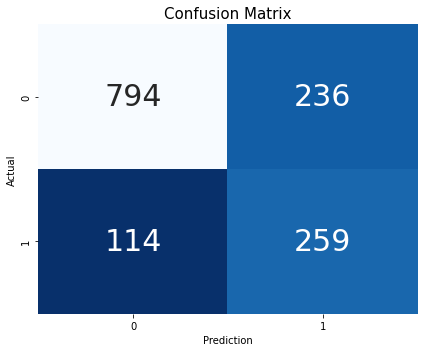

In [180]:
# Model Evaluation
import sklearn

## Predict on Train-Set and Test-Set
y_pred_train = model.predict(X_train_final) # predict Train data
y_pred_train = np.where(y_pred_train<0.5, 0, 1).squeeze()
y_pred_val = model.predict(X_val_final) # predict Val data
y_pred_val = np.where(y_pred_val<0.5, 0, 1).squeeze()
y_pred_test = model.predict(X_test_final) # predict Test data
y_pred_test = np.where(y_pred_test<0.5, 0, 1).squeeze()

# Evaluate Model of matriks
Train_score.append(sklearn.metrics.accuracy_score(y_train_final, y_pred_train)) # append in Train Score
Val_score.append(sklearn.metrics.accuracy_score(y_val_final, y_pred_val)) # Append in Val Score
Test_score.append(sklearn.metrics.accuracy_score(y_test, y_pred_test)) # Append in Test Score
# append Precission score
Precission.append(sklearn.metrics.precision_score(y_test, y_pred_test))
# append Recal score
Recall.append(sklearn.metrics.recall_score(y_test, y_pred_test))
# append F1 Score
F1_score.append(sklearn.metrics.f1_score(y_test, y_pred_test))
# append ROC Sccore
ROC_AUC_Score.append(sklearn.metrics.roc_auc_score(y_test, y_pred_test))

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',sklearn.metrics.classification_report(y_test, y_pred_test))
print('-'*50)
print('')

print('-'*50)
print('===== CCONFUSION MATRIX =====')
print('-'*50)
# Create function
predictions = []
for element in y_pred_test:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

# Create figure
plt.figure(figsize = (6, 5))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predictions),
            annot = True,
            fmt = '.0f',
            cmap = 'Blues_r', cbar=False,
            annot_kws={"fontsize":30})
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize = 15)
plt.tight_layout()
plt.show();

### 8.2 Functional API

--------------------------------------------------
===== CLASSIFICATION REPORT =====
--------------------------------------------------

               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1030
           1       0.49      0.73      0.59       373

    accuracy                           0.73      1403
   macro avg       0.69      0.73      0.69      1403
weighted avg       0.78      0.73      0.74      1403

--------------------------------------------------

--------------------------------------------------
===== CCONFUSION MATRIX =====
--------------------------------------------------


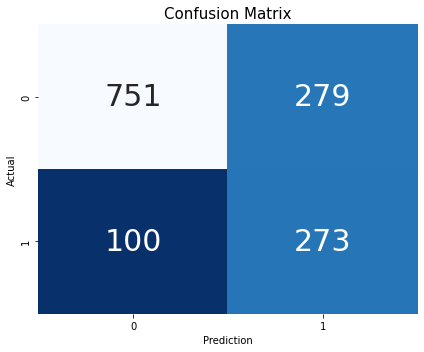

In [181]:
## Predict on Train-Set and Test-Set
y_pred_train = model_.predict(X_train_final) # predict Train data
y_pred_train = np.where(y_pred_train<0.5, 0, 1).squeeze()
y_pred_val = model_.predict(X_val_final) # predict Val data
y_pred_val = np.where(y_pred_val<0.5, 0, 1).squeeze()
y_pred_test = model_.predict(X_test_final) # predict Test data
y_pred_test = np.where(y_pred_test<0.5, 0, 1).squeeze()

# Evaluate Model of matriks
Train_score.append(sklearn.metrics.accuracy_score(y_train_final, y_pred_train)) # append in Train Score
Val_score.append(sklearn.metrics.accuracy_score(y_val_final, y_pred_val)) # Append in Val Score
Test_score.append(sklearn.metrics.accuracy_score(y_test, y_pred_test)) # Append in Test Score
# append Precission score
Precission.append(sklearn.metrics.precision_score(y_test, y_pred_test))
# append Recal score
Recall.append(sklearn.metrics.recall_score(y_test, y_pred_test))
# append F1 Score
F1_score.append(sklearn.metrics.f1_score(y_test, y_pred_test))
# append ROC Sccore
ROC_AUC_Score.append(sklearn.metrics.roc_auc_score(y_test, y_pred_test))

print('-'*50)
print('===== CLASSIFICATION REPORT =====')
print('-'*50)
print('\n',sklearn.metrics.classification_report(y_test, y_pred_test))
print('-'*50)
print('')

print('-'*50)
print('===== CCONFUSION MATRIX =====')
print('-'*50)
# Create function
predictions = []
for element in y_pred_test:
    if element > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

# Create figure
plt.figure(figsize = (6, 5))
sns.heatmap(sklearn.metrics.confusion_matrix(y_test, predictions),
            annot = True,
            fmt = '.0f',
            cmap = 'Blues_r', cbar=False,
            annot_kws={"fontsize":30})
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize = 15)
plt.tight_layout()
plt.show();

### 8.3 Model Compare


In [182]:
# comparison algorithm
model_compare = pd.DataFrame({'Model ANN': ['Sequential API', 'Functional API'],
                          'Train score' : Train_score,
                          'Val score' : Val_score,
                          'Test score': Test_score,
                          'Precission' : Precission,
                          'Recall' : Recall,
                          'F1 Score': F1_score,
                          'ROC Score': ROC_AUC_Score})

# Menampilkan model
model_compare.set_index('Model ANN').sort_values(by=['Recall'], ascending=False)

,Train score,Val score,Test score,Precission,Recall,F1 Score,ROC Score
Model ANN,,,,,,,
Functional API,0.832246,0.792602,0.729865,0.494565,0.731903,0.590270,0.730515
Sequential API,0.831943,0.789569,0.750535,0.523232,0.694370,0.596774,0.732622


Dari hasil evaluasi model terlihat bahwa model dengan menggunkaan **Functional API** lebih baik berdasarkan metriks **Recal** karena model mampu memprediksi pelanggan yang benar-benar akan **Churn**.

Berdasarkan dari model **Functional API** kita menggunkan : 
* Input layer dengan shape 7
* 3 hidden layer dengan neuron (60, 40 dan 20) menggunakan activation='relu'
* setiap layer diberikan normalization dengan harapan proses training data lebih cepat. Dari beberapa artikel menyebutkan bahwa proses ini untuk menstandarisasi input ke network, bahkan dalam beberapa kasus dapat mempercepat training data dan mengurangi generalization error.
* Output layer dengan activation='Sigmoid'



# 9. Model Saving

>Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

Dari hasil informasi yang telah kita dapatkan melalui evaluation model di dapatkan model **Functional API** terbaik dalam melakukan kasus klasifikasi untuk memprediksi pelanggan akan **Churn** atau tidak.

In [183]:
# Check firts to see if file exist already
# If not, the model is saved to disk
import os.path
if os.path.isfile('models/model_functional.h5') is False:
  model_.save('models/model_functional.h5')

In [184]:
# Load models
new_model = tf.keras.models.load_model('/content/models/model_functional.h5')
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 Dense1 (Dense)              (None, 60)                480       
                                                                 
 batch_normalization_11 (Bat  (None, 60)               240       
 chNormalization)                                                
                                                                 
 Dense2 (Dense)              (None, 40)                2440      
                                                                 
 batch_normalization_12 (Bat  (None, 40)               160       
 chNormalization)                                                
                                                                 
 Dense3 (Dense)              (None, 20)                820 

# 10. Model Inference

In [185]:
# melihat data inference yang telah kita siapkan sebelumnya
data_inf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),82.70,5831.20,No
1,Male,No,No,No,3,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,191.35,Yes
2,Male,No,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.30,75.30,Yes
3,Male,No,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.70,553.40,No
4,Female,No,Yes,No,60,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,No


In [186]:
# Add data inference to Pipeline
data_inf_pipe = preprocessor.transform(data_inf)

# Selection fitur
data_inf_select = pd.DataFrame(data_inf_pipe, columns = columns)
data_inf_final = data_inf_select.drop(col, axis=1) # drop columns

# Predict Model Inference
y_pred_inf = model_.predict(data_inf_final)
y_pred_inf = np.where(y_pred_test<0.5, 0, 1).squeeze()
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn - Prediction'])
y_pred_inf.replace({0:'No', 1:'Yes'}, inplace=True)

# Create New Variabel DataFrame
data_inf_select = data_inf[['gender', 'TotalCharges', 'Churn']]
# Concate to Original Inference-Set
pd.concat([data_inf_select, y_pred_inf], axis=1).head(10)

,gender,TotalCharges,Churn,Churn - Prediction
0,Female,5831.20,No,Yes
1,Male,191.35,Yes,No
2,Male,75.30,Yes,Yes
3,Male,553.40,No,Yes
4,Female,6640.70,No,No
5,Male,7325.10,No,Yes
6,Female,1536.75,No,Yes
7,Female,365.65,Yes,Yes
8,Female,3069.45,No,No
9,Female,302.35,No,No


Dari hasil model inference terlihat bahwa model dapat melakukan prediksi, tetapi tidak terlalu tepat.

# 11. Pengambilan Kesimpulan

Oke kita sudah selasai membuat sebuah model dengan bantuan algoritma ANN, yang diperuntukan untuk memprediksi klasifikasi biner, untuk membantu perusahaan dalam melakukan apakah pelanggan akan melakukan **Churn** atau tidak dengan mempertimbangkan beberapa fitur yang digunakan untuk mendapatkan hasil model yang cukup baik.

### EDA Analysis
Setelah kita melakukan Exploratory Data Analysis (EDA) secara singkat kita dapat menarik kesimpulan sebagai berikut:
- Dari hasil informasi mengenai dataset ini, dataset ini memiliki 7043 baris data dan 21 kolom.
- Dari informasi statistik yang didapatkan bahwa:
  - Para pelanggan rata-rata mengambil `tenure` selama 32 bulan dan maximum adalah 72 bulan. 
  - Para pelanggan juga memiliki biaya rata-rata perbulan yang dibebankan biaya sebesar 64.78 dan dengan beban maximum biaya 1888.75
- Dari hasil informasi mengenai para pelanggan yang melakukan `Churn` dapat dilihat bahwa sebanyak 1864 orang (26.54%) pelanggan melakukan **Churn** dan sebanyak 5174 orang (73.46%) pelanggan tidak melakukan **Churn** ini merupakan berita yang bisa dikataan cukup bagus untuk bisnis karena para pelanggan melakukan **Churn** lebih sedikit dibandingkan yang tidak melakukannya.
- Terlihat dari visualisasi bahwa para pelanggan cenderung mengambil `tenure` selama 1 bulan saja dengan masa `Contract` hanya perbulan saja dibandingkan dengan satu tahun dan dua tahun. Mungkin dapat di asumsikan tipe pelanggan seperti ini hanya ingin coba-coba layanan saja dan atau membandingkan dengan perusahaan sejenis.
- Dari informasi `Dependent` dan `Partner` bahwa para pelanggan cenderung lebih banyak melakukan **Churn** terhadap mereka yang tidak memiliki tanggungan dan tidak memiliki pasangan.
- Dari informasi seperti `Service` terlihat bahwa pelanggan cenderung melakukan **Churn** apabila mereka tidak memiliki teknisi support dan keamanan.
- Dari informasi biaya yang dibebankan perbulan terlihat bahwa para pelanggan akan **Churn** ketika biaya yang dibebankan terlalu besar dibandingkan dengan rata-rata beban biaya perbulan.

### Model Analysis
Dari hasil pemodelan dengan menggunakan algoritma ANN dengan 2 tipe yaitu **Sequential API** dan **Functional API** terlihat bahwa:
- **Sequential API** 
  - Dari melakukan epoch sebanyak 80x didapatkan hasil, terlihat bahwa akurasi dari training set akan semakin meningkat seiring berjalannya epoch. Tetapi akurasi dan validation akan naik seiring waktu walaupun tidak begitu sama persis dengan training set. Untuk loss training set sendiri semakin turun seiring berjalannya waktu, sementara loss validation set juga ikut turun namun sedikit demi sedikit dan terlihat tidak begitu signifikan dibandingkan dengan training set. Kemungkinan jika epoch ditambah, kemungkinan gap yang ada semakin bertambah. Namun dari Base model ini, dirasa sudah cukup baik karena gap kedua set ini (baik loss dan akurasi) tidak begitu jauh.
  - Dari hasil model evaluation menggunakan bebera metrik didapatkan hasil:
   - Karena kasus ini adalah classification, untuk menentukan apakah pelanggan **Churn** atau tidak. saya lebih prefer untuk melihat hasil dari metrik **Recal** karena matriks tersebut menekan **FNR**, sehingga model diharapkan mampu bekerja dengan baik. 
   - Precision = 0.52
   - Recal = 0.69
   - F1 Score = 0.59

- **Functional API**
  - Dari melakukan epoch sebanyak 80x didapatkan hasil, sama halnya dengan **Sequential API**. terlihat bahwa akurasi dari training set akan semakin meningkat seiring berjalannya epoch. Tetapi akurasi dan validation akan naik seiring waktu walaupun tidak begitu sama persis dengan training set. Untuk loss training set sendiri semakin turun seiring berjalannya waktu, sementara loss validation set juga ikut turun namun sedikit demi sedikit dan terlihat tidak begitu signifikan dibandingkan dengan training set. Kemungkinan jika epoch ditambah, kemungkinan gap yang ada semakin bertambah. Namun dari Base model ini, dirasa sudah cukup baik karena gap kedua set ini (baik loss dan akurasi) tidak begitu jauh.
  - Dari hasil model evaluation menggunakan bebera metrik didapatkan hasil:
   - Karena kasus ini adalah classification, untuk menentukan apakah pelanggan **Churn** atau tidak. saya lebih prefer untuk melihat hasil dari metrik **Recal** karena matriks tersebut menekan **FNR**, sehingga model diharapkan mampu bekerja dengan baik. 
   - Precision = 0.49
   - Recal = 0.73
   - F1 Score = 0.59

Berdasarkan hasil evalution score terlihat bahwa model **ANN Functional API** sedikit lebih unggul dibandingkan dengan **ANN Sequential API** dilihat dari score **Recal** karena model lebih fokus untuk menekan **FNR** untuk mencegah para pelanggan akan melakukan **Churn** untuk meningkatkan pendapatan dan menurunkan pengeluaran secara bisnis. 

Dari model **ANN Functional API** kita menggunkan : 
* 1 input layer
* 3 hidden layer (dengan masing neuron 60, 40, dan 20), activation = relu. ''' Activation yang dipakai relu, karena berdasarkan yang saya ketahui untuk base model coba menggunakan relu terlebih dahulu, baru dicoba gunakan activation yang lain (harus di state di awal, karena defaultnya adalah None)'''.
* 1 output layer, dengan 1 neuron dan activation = sigmoid. Karena sigmoid nilainya dari 0-1 dan target dataset ini adalah klasifikasi binary.
* Saya juga menambahkan batchnormalization di sini setiap layer, dengan harapan proses training data lebih cepat. Dari beberapa artikel menyebutkan bahwa proses ini untuk menstandarisasi input ke network, bahkan dalam beberapa kasus dapat mempercepat training data dan mengurangi generalization error. 